In [169]:
# Partie 1 : Data Visualisation, Feature Selection et Normalisation


In [170]:
## Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from pandas.plotting import scatter_matrix


In [171]:
# Chargement du Data Set
column_names = [
    "preg", "plas", "pres", "skin", "test", "mass", "pedi", "age", "class"
]
data = pd.read_csv("./pima-indians-diabetes (1).csv",names=column_names, header=0)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [172]:
# Étape 1 : Exploration des données
data.info()
print("\nDonnées manquantes par colonne :\n", data.isnull().sum())
print("\nDescription des colonnes :\n", data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    767 non-null    int64  
 1   plas    767 non-null    int64  
 2   pres    767 non-null    int64  
 3   skin    767 non-null    int64  
 4   test    767 non-null    int64  
 5   mass    767 non-null    float64
 6   pedi    767 non-null    float64
 7   age     767 non-null    int64  
 8   class   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Données manquantes par colonne :
 preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

Description des colonnes :
              preg        plas        pres        skin        test        mass  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877  

In [173]:
# Étape 2 : Résumé statistique avec interprétation
summary = data.describe()
print(summary)


             preg        plas        pres        skin        test        mass  \
count  767.000000  767.000000  767.000000  767.000000  767.000000  767.000000   
mean     3.842243  120.859192   69.101695   20.517601   79.903520   31.990482   
std      3.370877   31.978468   19.368155   15.954059  115.283105    7.889091   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   32.000000   32.000000   
75%      6.000000  140.000000   80.000000   32.000000  127.500000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  767.000000  767.000000  767.000000  
mean     0.471674   33.219035    0.348110  
std      0.331497   11.752296    0.476682  
min      0.078000   21.000000    0.000000  
25%      0.243500   24.000000    0.000000  
50%   

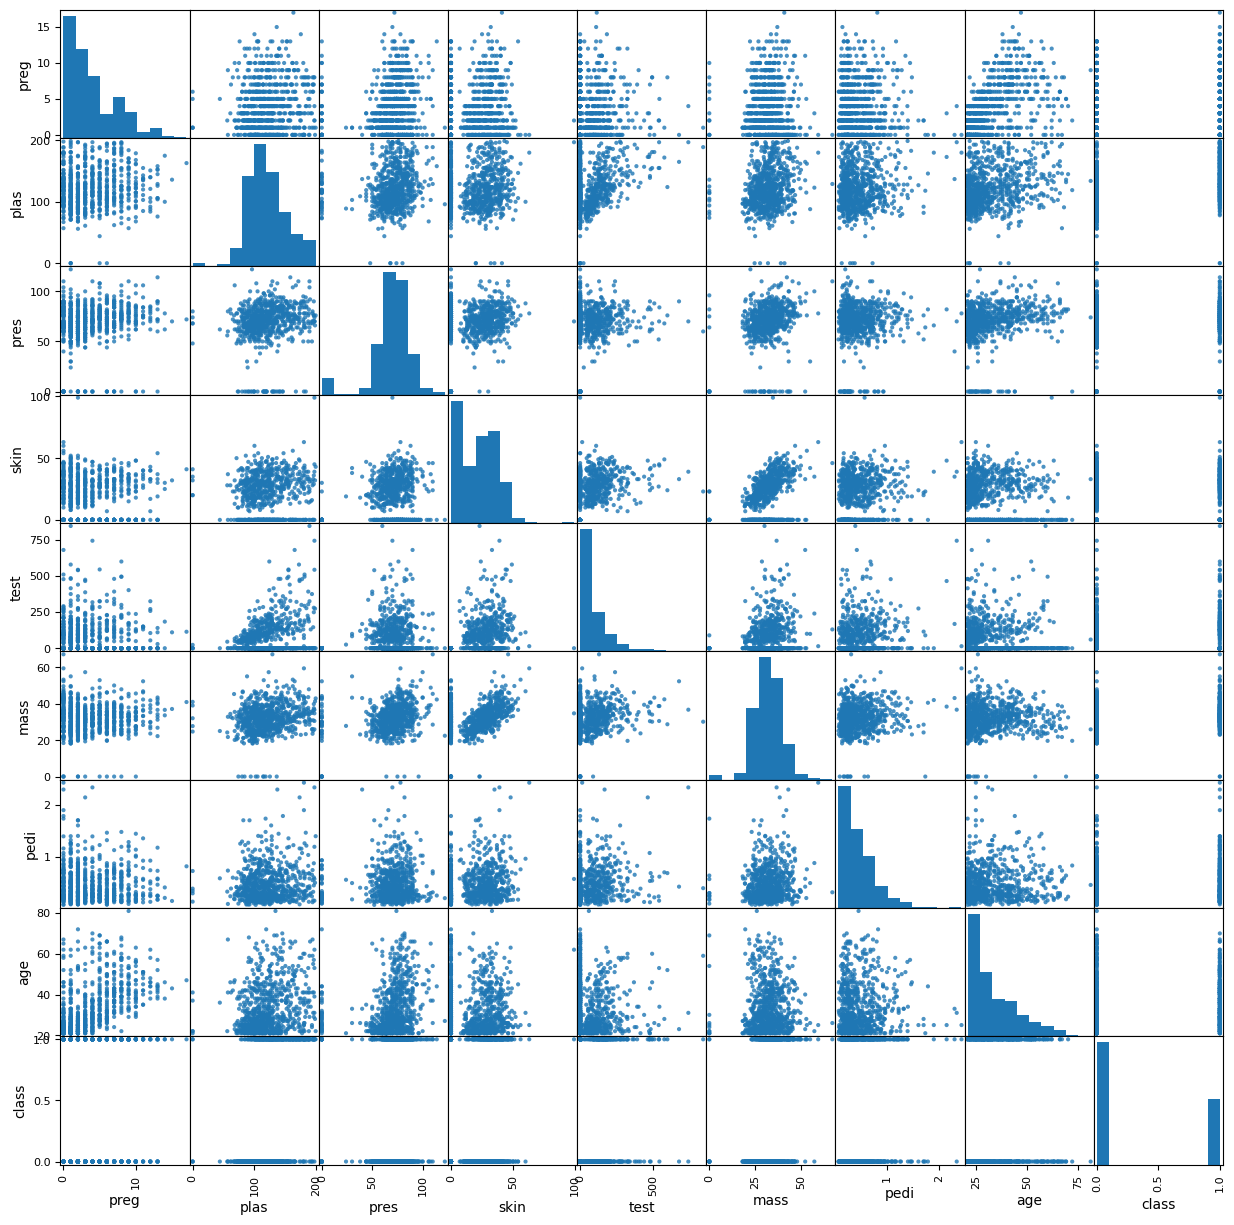

In [174]:
# Étape 3 : Nuages de points (Scatter Matrix)
scatter_matrix(data, alpha=0.8, figsize=(15, 15), diagonal="hist")
plt.show()


In [175]:
# Étape 4 : Sélection des features

# a) Méthode 1 - Univariate Selection
X = data.iloc[:, :-1]  # Toutes les colonnes sauf la cible
y = data.iloc[:, -1]   # La colonne cible
best_features = SelectKBest(score_func=chi2, k=4)
fit = best_features.fit(X, y)
print("Scores des meilleures features :\n", fit.scores_)


Scores des meilleures features :
 [ 110.72718168 1406.59049075   17.50499769   51.00789486 2219.39781908
  127.67149145    5.35636428  178.01076049]


In [176]:
# b) Méthode 2 - PCA
pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)
print("Variance expliquée par composante PCA :\n", pca.explained_variance_ratio_)

Variance expliquée par composante PCA :
 [0.88863537 0.06151977 0.02580249 0.01307357]


In [177]:
# c) Méthode 3 - Recursive Feature Elimination (RFE)
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=4)
rfe_result = rfe.fit(X, y)
print("Features sélectionnées par RFE :\n", rfe_result.support_)

Features sélectionnées par RFE :
 [False  True False False False  True  True  True]


In [178]:
# d) Méthode 4 - Feature Importance (via RandomForest)
model.fit(X, y)
importances = model.feature_importances_
print("Importances des features :\n", importances)


Importances des features :
 [0.08287236 0.26754747 0.08673843 0.06567362 0.07180364 0.16577884
 0.12295367 0.13663197]


In [179]:
# Étape 5 : Normalisation des données
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("Données normalisées (exemple) :\n", X_scaled[:5])

Données normalisées (exemple) :
 [[0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]
 [0.29411765 0.58291457 0.60655738 0.         0.         0.38152012
  0.05251921 0.15      ]]


In [180]:
# Partie 2 : Classification et choix de l'algorithme adéquat

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [181]:
# Création des ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [182]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM (Linear)": SVC(kernel="linear", probability=True, random_state=42),
    "SVM (RBF)": SVC(kernel="rbf", probability=True, random_state=42),
    "SVM (Polynomial)": SVC(kernel="poly", probability=True, random_state=42),
    "SVM (Sigmoid)": SVC(kernel="sigmoid", probability=True, random_state=42),
    "ANN": MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

In [183]:
# Entraînement et sauvegarde des modèles
from joblib import dump

# Entraîner et sauvegarder chaque modèle
for name, model in models.items():
    model.fit(X_train, y_train)
    dump(model, f"{name}_model.joblib")
    print(f"Modèle {name} sauvegardé.")


Modèle KNN sauvegardé.
Modèle Decision Tree sauvegardé.
Modèle Naive Bayes sauvegardé.
Modèle SVM (Linear) sauvegardé.
Modèle SVM (RBF) sauvegardé.
Modèle SVM (Polynomial) sauvegardé.
Modèle SVM (Sigmoid) sauvegardé.
Modèle ANN sauvegardé.


In [184]:
# Évaluation des modèles

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, log_loss

# Évaluation des modèles
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None

    print(f"\nModèle : {name}")
    print("Accuracy:", model.score(X_test, y_test))
    if y_proba is not None:
        print("Log Loss:", log_loss(y_test, y_proba))
        print("ROC AUC:", roc_auc_score(y_test, y_proba[:, 1]))
    else:
        print("Log Loss: N/A")
        print("ROC AUC: N/A")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))



Modèle : KNN
Accuracy: 0.7337662337662337
Log Loss: 1.1650941328245505
ROC AUC: 0.7895641164767588
Confusion Matrix:
 [[80 17]
 [24 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.82      0.80        97
           1       0.66      0.58      0.62        57

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.73      0.73       154


Modèle : Decision Tree
Accuracy: 0.6688311688311688
Log Loss: 11.936534563928408
ROC AUC: 0.6502984264785675
Confusion Matrix:
 [[70 27]
 [24 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.72      0.73        97
           1       0.55      0.58      0.56        57

    accuracy                           0.67       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.67      0.67      0.67       154


Modèle : Na

In [185]:
# Chargement des modèles et prédictionsf
from joblib import load
from sklearn.ensemble import BaggingClassifier, StackingClassifier, GradientBoostingClassifier

# Charger les modèles sauvegardés
model_files = [
    "KNN_model.joblib",
    "Decision Tree_model.joblib",
    "Naive Bayes_model.joblib",
    "SVM (Linear)_model.joblib",
    "SVM (RBF)_model.joblib"
]

for model_file in model_files:
    model = load(model_file)
    y_pred = model.predict(X_test)
    print(f"Prédictions avec le modèle chargé ({model_file}): {y_pred[:10]}")


Prédictions avec le modèle chargé (KNN_model.joblib): [0 0 0 1 0 0 0 1 1 0]
Prédictions avec le modèle chargé (Decision Tree_model.joblib): [0 0 0 0 0 0 0 1 0 0]
Prédictions avec le modèle chargé (Naive Bayes_model.joblib): [0 0 0 0 0 0 0 0 0 0]
Prédictions avec le modèle chargé (SVM (Linear)_model.joblib): [0 0 0 0 0 0 0 0 1 0]
Prédictions avec le modèle chargé (SVM (RBF)_model.joblib): [0 0 0 0 0 0 0 0 1 0]


In [186]:
# Chargement et prédirction avec les modèles d'ensemble learning
from sklearn.ensemble import BaggingClassifier, StackingClassifier, GradientBoostingClassifier

In [187]:
# Bagging
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
print("Prédictions avec Bagging:", bagging_pred[:10])


Prédictions avec Bagging: [0 0 0 0 0 0 0 0 1 0]


In [188]:
# Stacking
stacking = StackingClassifier(
    estimators=[("KNN", KNeighborsClassifier()), ("NB", GaussianNB())],
    final_estimator=DecisionTreeClassifier()
)
stacking.fit(X_train, y_train)
stacking_pred = stacking.predict(X_test)
print("Prédictions avec Stacking:", stacking_pred[:10])

Prédictions avec Stacking: [0 0 0 1 0 1 0 0 0 0]


In [189]:
# Boosting
boosting = GradientBoostingClassifier()
boosting.fit(X_train, y_train)
boosting_pred = boosting.predict(X_test)
print("Prédictions avec Boosting:", boosting_pred[:10])

Prédictions avec Boosting: [0 0 0 0 0 0 0 1 1 0]
